### Predicting a Startups Profit/Success Rate using Multiple Linear Regression in Python

Here 50 startups dataset containing 5 columns  like “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Profit”.

In this dataset first 3 columns provides you spending on Research , Administration and Marketing respectively. State indicates startup based on that state. Profit indicates how much profits earned by a startup.

Clearly, we can understand that it is a multiple linear regression problem, as the independent variables are more than one.

Prepare a prediction model for profit of 50_Startups data in Python

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

startup_data = pd.read_csv('50Startups.csv')

print(startup_data.shape)
startup_data.head()

(50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Pre-processing

In [3]:
#One hot encoding using dummies. Change the state column into dummies 
state_dummies = pd.get_dummies(startup_data['State'])

#Add the state_dummies into the data along the columns
merged_df = pd.concat([startup_data, state_dummies], axis=1)

#drop the State column
final_data = merged_df.drop(['State'], axis=1)

#Drop one of the dummies columns to avoid dummy variable trap
final_data = final_data.drop(['New York'], axis=1)
final_data.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [4]:
X = final_data.drop('Profit', axis=1)
y = final_data['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(13, 5)


In [5]:
#Create the Linear regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

#Train the model
lr_model.fit(X_train, y_train)

#predict using the testing set
y_pred = lr_model.predict(X_test)

In [6]:
#Check model performance
from sklearn.metrics import r2_score, mean_squared_error
score = r2_score(y_pred, y_test)
MSE = mean_squared_error(y_test, y_pred)
print(f'Coefficient of Determination, R {score}')

Coefficient of Determination, R 0.9477890107662057


In [7]:
#Do prediction using new data

new_pred = lr_model.predict([[165350, 136898, 471784, 0, 0]])
print(f' Profit for new data is {new_pred}')

 Profit for new data is [191997.78365278]


<AxesSubplot:>

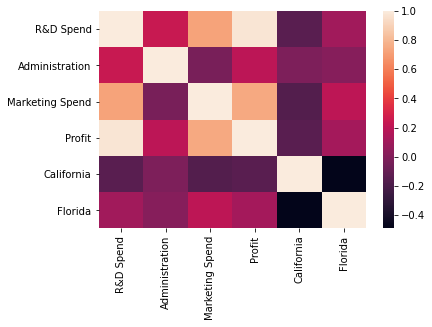

In [8]:
import seaborn as sns
sns.heatmap(final_data.corr())